# Calculate custom index: number of days with freezing mean temperature

Example notebook that runs icclim.

The example calculates the number of days when the minimum temperature is freezing or below for the dataset chosen by the user on C4I. It uses the custom user index functionality of icclim. 

We assume to have the **tas** variable in netCDF files in a `./data` folder.
The data can be dowloaded using the [metalink](data/cmcc_gfdl_tas.metalink) provided with this notebook.
The data described in a `.metalink` file can be dowloaded with tools such as [aria2](https://aria2.github.io/) or a browser plugin such as [DownThemAll!](https://addons.mozilla.org/en-US/firefox/addon/downthemall/)
If you wish to use a different dataset, you can use the [climate 4 impact portal](https://www.climate4impact.eu/c4i-frontend/) to search and select the data you wish to use and a metalink file to the [ESGF](https://esgf.llnl.gov/) data will be provided.


The data is read using xarray and a plot of the time series over a specific region is generated, as well as an average spatial map. Several output types examples are shown.

The dataset that is expected for this notebook are tas parameter for one specific climate model and experiment as well as one member. The time period should be continuous.

To keep this example fast to run, the following period is considered: 2015-01-01 to 2019-12-31, and plots are shown over European region.

### Packages Installation

In [1]:
%pip install icclim matplotlib nc_time_axis

Note: you may need to restart the kernel to use updated packages.


In [1]:
import datetime
import sys
from pathlib import Path

import cartopy.crs as ccrs
import cftime
import icclim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

print("python: ", sys.version)
print("numpy: ", np.__version__)
print("xarray: ", xr.__version__)
print("pandas: ", pd.__version__)
print("icclim: ", icclim.__version__)
print("cftime: ", cftime.__version__)

python:  3.11.7 | packaged by conda-forge | (main, Dec 15 2023, 08:38:37) [GCC 12.3.0]
numpy:  1.26.2
xarray:  2023.10.1
pandas:  2.1.4
icclim:  6.6.0
cftime:  1.6.3


### Specification of parameters

In [2]:
# studied period
dt1 = datetime.datetime(2015, 1, 1, tzinfo=datetime.timezone.utc)
dt2 = datetime.datetime(2019, 12, 31, tzinfo=datetime.timezone.utc)
out_f = "ndays_tas_below_freezing_icclim.nc"
data_dir = Path("data")
filenames = [str(f) for f in data_dir.glob("tas_day_GFDL-ESM4*.nc")]
filenames

['data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19300101-19491231.nc',
 'data/tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20550101-20741231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19700101-19891231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18700101-18891231.nc',
 'data/tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20350101-20541231.nc',
 'data/tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-20341231.nc',
 'data/tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20750101-20941231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19100101-19291231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18500101-18691231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18900101-19091231.nc',
 'data/tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20950101-21001231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19900101-20091231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_20100101-20141231.nc',
 'data/tas_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-19691231.nc']

In [3]:
from icclim.generic_indices.registry import GenericIndicatorRegistry

In [4]:
icclim.index(
    index_name=GenericIndicatorRegistry.CountOccurrences,
    in_files=filenames,
    threshold="< 0 deg_C",
    var_name="tas",
    slice_mode="year",
    time_range=[dt1, dt2],
    out_file=out_f,
    logs_verbosity="HIGH",
)

2024-01-19 15:52:48,544    ********************************************************************************************
2024-01-19 15:52:48,546    *                                                                                          *
2024-01-19 15:52:48,547    *          icclim                6.6.0   *
2024-01-19 15:52:48,549    *                                                                                          *
2024-01-19 15:52:48,550    *                                                                                          *
2024-01-19 15:52:48,550    *          Fri Jan 19 14:52:48 2024                                                    *
2024-01-19 15:52:48,551    *                                                                                          *
2024-01-19 15:52:48,551    *          BEGIN EXECUTION                                                                 *
2024-01-19 15:52:48,552    *                                                                  

<xarray.Dataset>
Dimensions:            (lat: 180, lon: 288, time: 5, bounds: 2)
Coordinates:
    height             float64 2.0
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                (lon) float64 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * time               (time) object 2015-07-02 00:00:00 ... 2019-07-02 00:00:00
  * bounds             (bounds) int64 0 1
Data variables:
    count_occurrences  (time, lat, lon) int64 dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    time_bounds        (time, bounds) object 2015-01-01 00:00:00 ... 2019-12-...
Attributes:
    title:        number_of_days_when_average_air_temperature_is_lower_than_t...
    references:   icclim
    institution:  Climate impact portal (https://climate4impact.eu)
    history:      \n [2024-01-19 14:52:50] Calculation of count_occurrences i...
    source:       
    Conventions:  CF-1.6

### Plot setup

In [5]:
with xr.open_dataset(out_f, decode_times=False) as ds:
    nf_xr = ds
    ds["time"] = xr.decode_cf(ds).time

print(nf_xr)

# Select a single x,y combination from the data
longitude = nf_xr["count_occurrences"]["lon"].sel(lon=3.5, method="nearest")
latitude = nf_xr["count_occurrences"]["lat"].sel(lat=44.2, method="nearest")

print("Long, Lat values:", longitude, latitude)

<xarray.Dataset>
Dimensions:            (lat: 180, lon: 288, time: 5, bounds: 2)
Coordinates:
    height             float64 ...
  * lat                (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                (lon) float64 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * time               (time) object 2015-07-02 00:00:00 ... 2019-07-02 00:00:00
  * bounds             (bounds) int64 0 1
Data variables:
    count_occurrences  (time, lat, lon) int64 ...
    time_bounds        (time, bounds) int64 ...
Attributes:
    title:        number_of_days_when_average_air_temperature_is_lower_than_t...
    references:   icclim
    institution:  Climate impact portal (https://climate4impact.eu)
    history:      \n [2024-01-19 14:52:50] Calculation of count_occurrences i...
    source:       
    Conventions:  CF-1.6
Long, Lat values: <xarray.DataArray 'lon' ()>
array(3.125)
Coordinates:
    height   float64 ...
    lon      float64 3.125
Attributes:
    long_name:      longitude


### Subset and plot count_occurrences

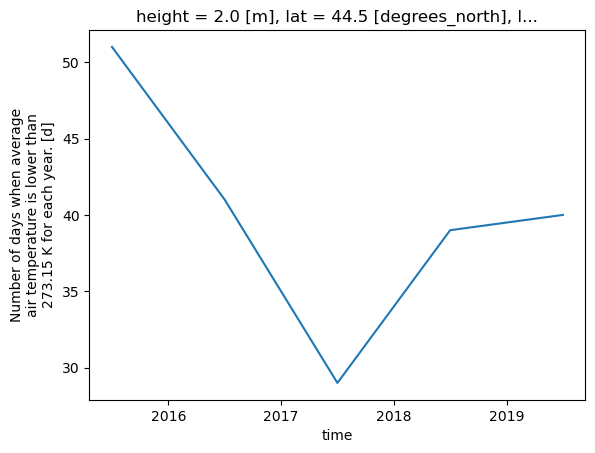

In [6]:
# Slice the data spatially using a single lat/lon point
one_point = nf_xr["count_occurrences"].sel(lat=latitude, lon=longitude)

# Use xarray to create a quick time series plot
one_point.plot.line()
plt.show()

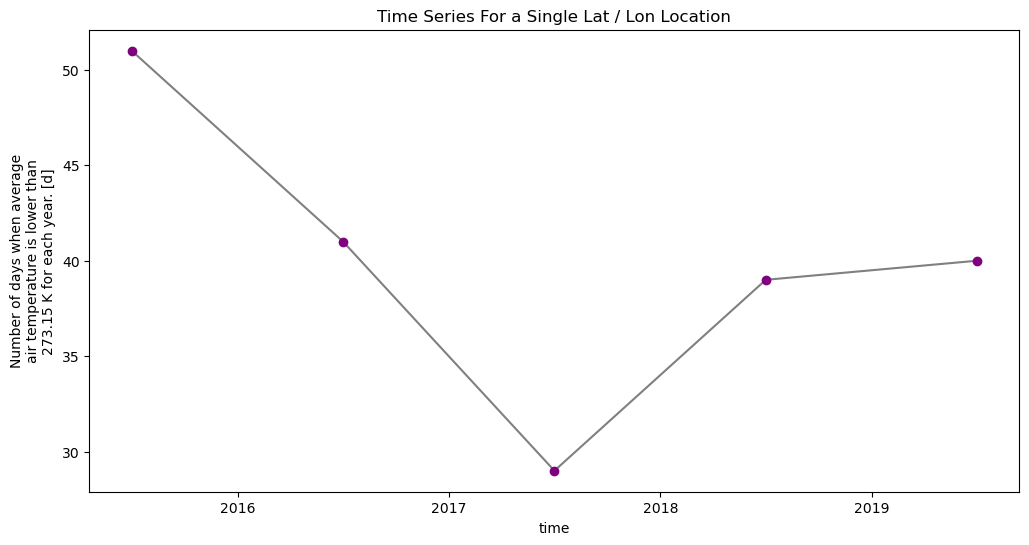

In [7]:
# You can clean up your plot as you wish using standard matplotlib approaches
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(
    hue="lat",
    marker="o",
    ax=ax,
    color="grey",
    markerfacecolor="purple",
    markeredgecolor="purple",
)
ax.set(title="Time Series For a Single Lat / Lon Location")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

In [8]:
# Convert to dataframe -- then this can easily be exported to a csv
one_point_df = one_point.to_dataframe()
# View just the first 5 rows of the data
one_point_df.head()

# Export data to .csv file
# one_point_df.to_csv("one-location.csv")

,height,lat,lon,count_occurrences
time,,,,
2015-07-02 00:00:00,2.0,44.5,3.125,51
2016-07-02 00:00:00,2.0,44.5,3.125,41
2017-07-02 00:00:00,2.0,44.5,3.125,29
2018-07-02 00:00:00,2.0,44.5,3.125,39
2019-07-02 00:00:00,2.0,44.5,3.125,40


In [9]:
# Time subsetting: this is just an example on how to do it
start_date = "2018-01-01"
end_date = "2019-12-31"

nf = nf_xr["count_occurrences"].sel(time=slice(start_date, end_date))

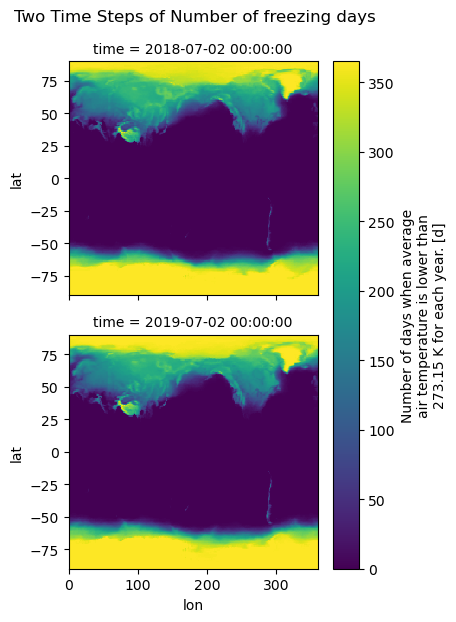

In [10]:
# Quickly plot the data using xarray.plot()
nf.plot(x="lon", y="lat", col="time", col_wrap=1)

plt.suptitle("Two Time Steps of Number of freezing days", y=1.03)
plt.show()

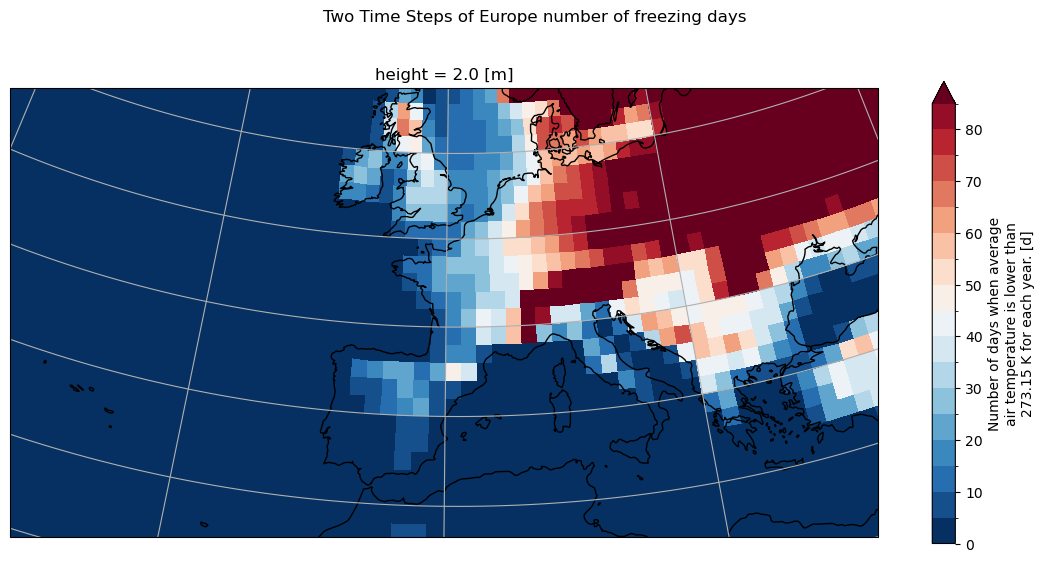

In [11]:
# Set spatial extent and centre
central_lat = 47.0
central_lon = 1.0
extent = [-30, 30, 30, 56]  # Western Europe

# Calculate time average
nf_avg = nf.mean(dim="time", keep_attrs=True)

# Set plot projection
map_proj = ccrs.AlbersEqualArea(
    central_longitude=central_lon, central_latitude=central_lat
)

# Define plot
f, ax = plt.subplots(figsize=(14, 6), subplot_kw={"projection": map_proj})

# Plot data with proper colormap scale range
levels = np.arange(0, 90, 5)
p = nf_avg.plot(levels=levels, cmap="RdBu_r", transform=ccrs.PlateCarree())

# Plot information
plt.suptitle("Two Time Steps of Europe number of freezing days", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig("c4i_nf_icclim.png")

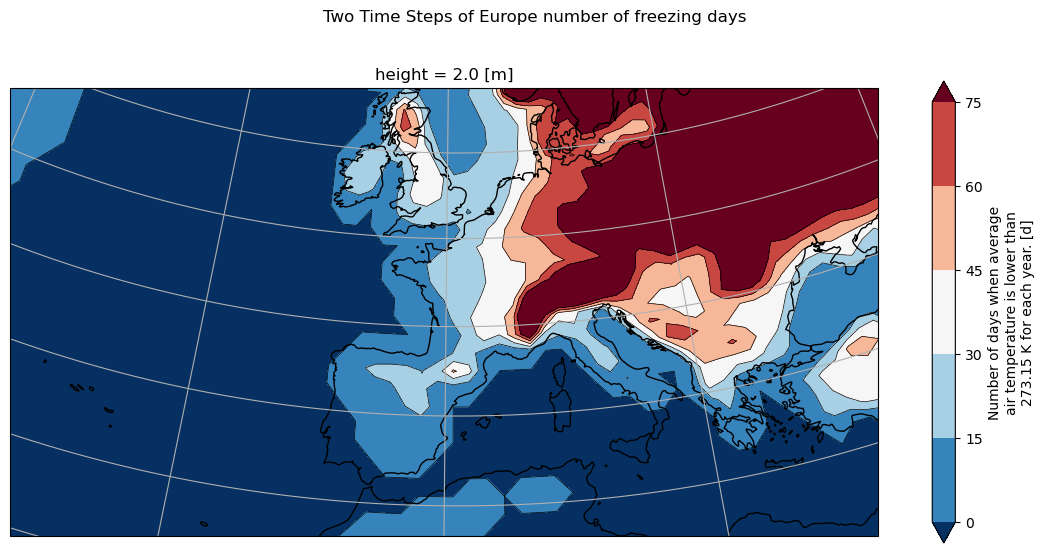

In [12]:
# Re-order longitude so that there is no blank line at 0 deg because 0 deg is within our spatial selection
nf_avg.coords["lon"] = (nf_avg.coords["lon"] + 180) % 360 - 180
nf_avg = nf_avg.sortby(nf_avg.lon)

# Define plot
f, ax = plt.subplots(figsize=(14, 6), subplot_kw={"projection": map_proj})

# Define colorscale
levels = np.arange(0, 90, 15)

# Contours lines
p = nf_avg.plot.contour(
    levels=levels, colors="k", linewidths=0.5, transform=ccrs.PlateCarree()
)

# Contour filled colors
p = nf_avg.plot.contourf(
    levels=levels, cmap="RdBu_r", extend="both", transform=ccrs.PlateCarree()
)

# Plot information
plt.suptitle("Two Time Steps of Europe number of freezing days", y=1)

# Add the coastlines to axis and set extent
ax.coastlines()
ax.gridlines()
ax.set_extent(extent)

# Save plot as png
plt.savefig("c4i_nf_contours_icclim.png")